
# Scientific Papers Trend Analysis
## arxiv dataset from Cornell University


#### Importing required python libraries

In [1]:
import dask.bag as db
import datetime
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder



#### Reading json data file and converting to csv file for further processing

In [2]:
# JSON file in more than 3 GB here I am using dask.bag to read this big file
# dask.bag use parallal processing which make it faster then pandas

In [3]:
# Load the JSON file
docs = db.read_text('arxiv-metadata-oai-snapshot.json').map(json.loads)


In [4]:
#Total number of documents: 2184335
docs.count().compute()

2184335

In [5]:
# Looking at one document:
docs.take(1)

({'id': '0704.0001',
  'submitter': 'Pavel Nadolsky',
  'authors': "C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan",
  'title': 'Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies',
  'comments': '37 pages, 15 figures; published version',
  'journal-ref': 'Phys.Rev.D76:013009,2007',
  'doi': '10.1103/PhysRevD.76.013009',
  'report-no': 'ANL-HEP-PR-07-12',
  'categories': 'hep-ph',
  'license': None,
  'abstract': '  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with d

In [6]:
# Extracting year of publication from 'versions'

In [7]:
get_year = lambda x: x['versions'][-1]['created']


In [8]:
# Extracting only the data which is most important for this analysis


In [9]:
def trim(x):
    # Extract the year from the created field
    year = int(get_year(x).split(' ')[3])
    
    # Return a dictionary with the necessary fields
    return {'id': x['id'],
            'authors': x['authors'],
            'title': x['title'],
            'category':x['categories'].split(' '),
            'year': year}


In [10]:
# Converting data into dataframe

In [11]:
columns = ['id', 'authors', 'title', 'category','year']
docs_df = (docs.filter(lambda x: int(get_year(x).split(' ')[3])) # if we choose > 2016 then it will show only.
           .map(trim).
           compute())

# Convert to pandas DataFrame
docs_df = pd.DataFrame(docs_df, columns=columns)


In [12]:
#save all dataset for later use so we can skip the dataset trimming later
docs_df.to_csv("arxiv_1986_2022.csv", index=False)

In [13]:
# Look at sample of dataframe
docs_df.head(10)

,id,authors,title,category,year
0,0704.0001,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,[hep-ph],2007
1,0704.0002,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,"[math.CO, cs.CG]",2008
2,0704.0003,Hongjun Pan,The evolution of the Earth-Moon system based o...,[physics.gen-ph],2008
3,0704.0004,David Callan,A determinant of Stirling cycle numbers counts...,[math.CO],2007
4,0704.0005,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,"[math.CA, math.FA]",2007
5,0704.0006,Y. H. Pong and C. K. Law,Bosonic characters of atomic Cooper pairs acro...,[cond-mat.mes-hall],2007
6,0704.0007,"Alejandro Corichi, Tatjana Vukasinac and Jose ...",Polymer Quantum Mechanics and its Continuum Limit,[gr-qc],2007
7,0704.0008,Damian C. Swift,Numerical solution of shock and ramp compressi...,[cond-mat.mtrl-sci],2008
8,0704.0009,"Paul Harvey, Bruno Merin, Tracy L. Huard, Luis...","The Spitzer c2d Survey of Large, Nearby, Inste...",[astro-ph],2007
9,0704.0010,Sergei Ovchinnikov,"Partial cubes: structures, characterizations, ...",[math.CO],2007


In [14]:
docs_df.shape

(2184335, 5)

## Further trim data by year 2019 to 2022

In [28]:
# Read the CSV file
df = pd.read_csv('arxiv_1986_2022.csv', low_memory=False)

# Filter the data by year
filtered_df = df[df['year'] >= 2019]

# Write the filtered data to a new CSV file
filtered_df.to_csv('arxiv_2019_2022.csv', index=False)

In [29]:
# Read the CSV file
df = pd.read_csv('arxiv_2019_2022.csv', low_memory=False)

In [30]:
df.head()

,id,authors,title,category,year
0,0704.0033,"Maxim A. Yurkin, Valeri P. Maltsev, Alfons G. ...",Convergence of the discrete dipole approximati...,"['physics.optics', 'physics.comp-ph']",2022
1,0704.0038,"Maxim A. Yurkin, Alfons G. Hoekstra",The discrete dipole approximation: an overview...,"['physics.optics', 'physics.comp-ph']",2022
2,0704.0479,T.Geisser,The affine part of the Picard scheme,"['math.AG', 'math.KT']",2021
3,0704.1445,Yasha Gindikin and Vladimir A. Sablikov,Deformed Wigner crystal in a one-dimensional q...,"['cond-mat.str-el', 'cond-mat.mes-hall']",2019
4,0704.1476,Chris Austin,TeV-scale gravity in Horava-Witten theory on a...,['hep-th'],2022


In [31]:
df.shape

(749279, 5)

In [38]:


# Filter the data by year
filtered_df = df_2022[df_2022['year'] >= 2022]

# Write the filtered data to a new CSV file
filtered_df.to_csv('arxiv_2022.csv', index=False)

In [39]:
# Read the CSV file
df_2022 = pd.read_csv('arxiv_2022.csv', low_memory=False)
df_2022.head()

,id,authors,title,category,year
0,0704.0033,"Maxim A. Yurkin, Valeri P. Maltsev, Alfons G. ...",Convergence of the discrete dipole approximati...,"['physics.optics', 'physics.comp-ph']",2022
1,0704.0038,"Maxim A. Yurkin, Alfons G. Hoekstra",The discrete dipole approximation: an overview...,"['physics.optics', 'physics.comp-ph']",2022
2,0704.1476,Chris Austin,TeV-scale gravity in Horava-Witten theory on a...,['hep-th'],2022
3,0705.1155,Kerry M. Soileau,State Vector Determination By A Single Trackin...,['astro-ph'],2022
4,0705.3841,Michael Andreas Schmidt,Renormalization Group Evolution in the type I ...,['hep-ph'],2022


In [40]:
df_2022.shape

(231875, 5)

In [19]:
#save trimmed dataset for later use so we can skip the dataset trimming later:
# docs_df.to_csv("arxiv_from_2017.csv", index=False)

In [21]:
# Group the data by year and count the number of records in each year
year_counts = docs_df.groupby('year').size()

# Print the year and count for each group
for year, count in year_counts.items():
    print(year, count)


1986 1
1988 1
1989 5
1990 24
1991 340
1992 3093
1993 6506
1994 9733
1995 12566
1996 15282
1997 18957
1998 23265
1999 26866
2000 29936
2001 32178
2002 34798
2003 38224
2004 42098
2005 45389
2006 48558
2007 54125
2008 56939
2009 62214
2010 67452
2011 73406
2012 81412
2013 89704
2014 94332
2015 101642
2016 110751
2017 119762
2018 135497
2019 150844
2020 175642
2021 190918
2022 231875


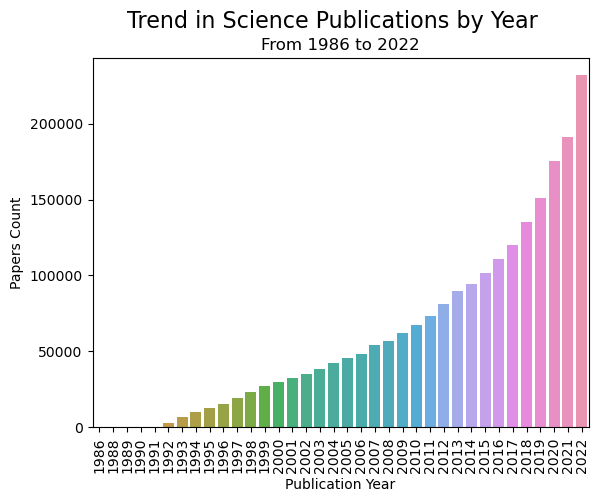

In [55]:
# Let us check how the research papers are evolving over time from 1985 to 2022
# Create a countplot of the year column
sns.countplot(x='year', data=docs_df)

# Add labels and show the plot
plt.xlabel('Publication Year')
plt.ylabel('Papers Count')
plt.title('From 1986 to 2022', fontsize=12)
plt.suptitle('Trend in Science Publications by Year', fontsize=16)
plt.xticks(rotation=90)
plt.savefig('trend_by_year.jpg',dpi=200,bbox_inches='tight')
plt.show()



In [62]:
# view the data before 1991 
docs_df[docs_df['year'] < 1991].head(10)

,id,authors,category,year
1936944,cs/9301111,Donald E. Knuth,[cs.CC],1990
1936945,cs/9301112,Donald E. Knuth,[cs.GR],1990
2046889,hep-th/9108028,Paul Ginsparg,[hep-th],1988
2115403,math/9201203,Keith Ball (Texas A&M University) and Alain Pa...,"[math.MG, math.FA]",1989
2115404,math/9201204,Keith Ball,"[math.MG, math.FA]",1989
2115405,math/9201205,Keith Ball,"[math.MG, math.FA]",1989
2115406,math/9201206,Gideon Schechtman and Joel Zinn,"[math.FA, math.MG]",1989
2115408,math/9201208,William B. Johnson and Gideon Schechtman,"[math.PR, math.FA]",1990
2115409,math/9201209,Nassif Ghoussoub and William B. Johnson,[math.FA],1990
2115410,math/9201210,Paulette Saab,[math.FA],1990


In [63]:
# view the data in year 2022
docs_df[docs_df['year'] == 2022].head(10)


,id,authors,category,year
32,0704.0033,"Maxim A. Yurkin, Valeri P. Maltsev, Alfons G. ...","[physics.optics, physics.comp-ph]",2022
37,0704.0038,"Maxim A. Yurkin, Alfons G. Hoekstra","[physics.optics, physics.comp-ph]",2022
1475,0704.1476,Chris Austin,[hep-th],2022
5157,0705.1155,Kerry M. Soileau,[astro-ph],2022
7843,0705.3841,Michael Andreas Schmidt,[hep-ph],2022
9824,0706.1138,Susumu Oda,"[math.AC, math.AG]",2022
11723,0706.3037,Kerry Michael Soileau,[math.GM],2022
11968,0706.3282,Tao Zhang,"[math.QA, math.RA]",2022
12650,0706.3964,"Anna Felikson, Pavel Tumarkin","[math.MG, math.CO, math.GR]",2022
12851,0706.4165,"A. Ali, A.V. Borisov, D.V. Zhuridov","[hep-ph, hep-ex, nucl-th]",2022


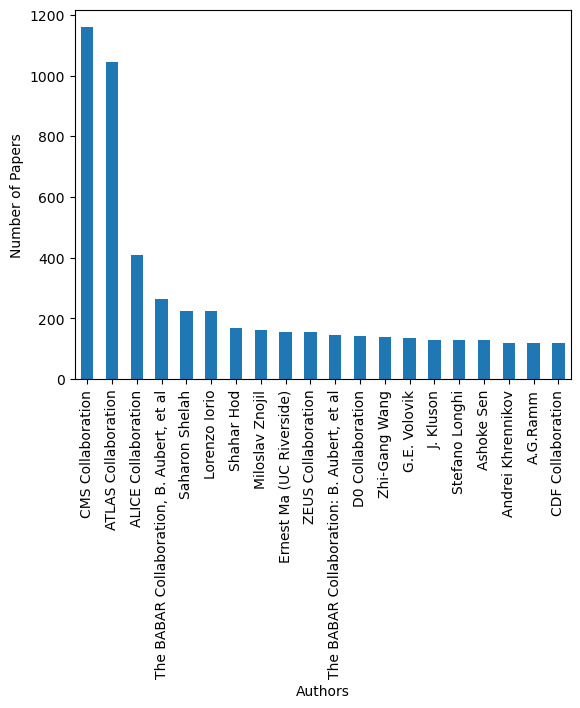

In [69]:
# Group the data by the 'authors' column and count the number of papers for each author
author_counts = docs_df.groupby('authors')['id'].count().sort_values(ascending=False)

# Take the top 20 authors with the most papers
top_authors = author_counts.head(20)

# Plot the results using a bar chart
top_authors.plot(kind='bar', xlabel='Authors', ylabel='Number of Papers')
plt.show()


In [ ]:
author_counts = docs_df.groupby(['year','authors'])['id'].count().sort_values(ascending=False)
author_counts.unstack().plot(kind='bar',stacked=True)


In [ ]:
author_counts = docs_df.pivot_table(values='id', index='year', columns='authors', aggfunc='count')
sns.heatmap(author_counts, cmap='Blues')


In [67]:
# Converting column 'category' from list to string values.
# Encoders require their input to be uniformly strings or numbers. Not list.
docs_df['category'] = docs_df['category'].apply(lambda x: ' '.join(x))


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Perform one-hot encoding
ohe = OneHotEncoder()
category_encoded = ohe.fit_transform(docs_df[['category']])

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    preds = kmeans.fit_predict(category_encoded)
    score = silhouette_score(category_encoded, preds, metric='euclidean')
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))


In [68]:
from sklearn.preprocessing import OneHotEncoder

# Perform one-hot encoding
ohe = OneHotEncoder()
category_encoded = ohe.fit_transform(docs_df[['category']])

# Perform k-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(category_encoded)
docs_df['cluster_labels'] = kmeans.labels_


# view the cluster labels
print(docs_df[['category','category_encoded','cluster_labels']])


KeyError: "['category_encoded'] not in index"